In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from reader import read_data
from feature_engineering import clean_dataset

In [3]:
import shap
shap.initjs()

c:\users\thiba\documents\coding\projects\python\comp_default\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
c:\users\thiba\documents\coding\projects\python\comp_default\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit 

In [6]:
# Dataset for SHAP analysis
def dataset_for_shap():
    default_risk_dataset = read_data(default_year=1)
    cleaned_default_risk = clean_dataset(
        default_risk_dataset,
        ratio_na_per_features=0.05,
        nb_na_sample_threshold=0,
        ratio_under_oversampled=0.2
    )
    return cleaned_default_risk

df_shap = dataset_for_shap()

In [31]:
# SHAP study
X = df_shap.drop('X_65', axis=1)
y = df_shap['X_65']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_shap = DecisionTreeClassifier()
model_shap.fit(X_train, y_train)

explainer = shap.Explainer(model_shap)
shap_values = explainer.shap_values(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


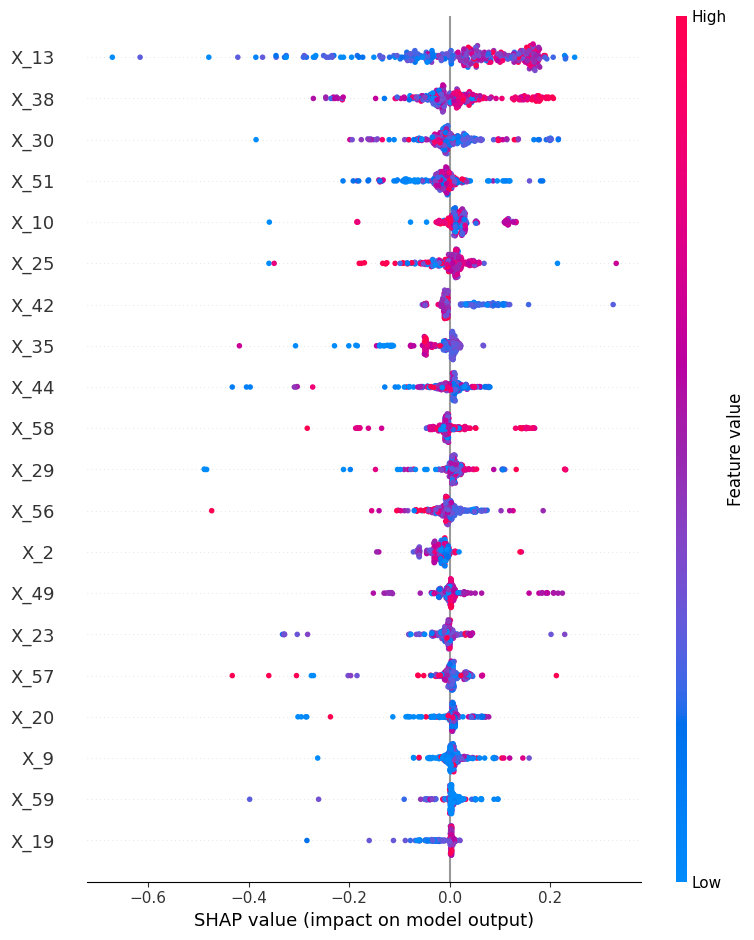

In [32]:
shap.summary_plot(shap_values[0], X_test)

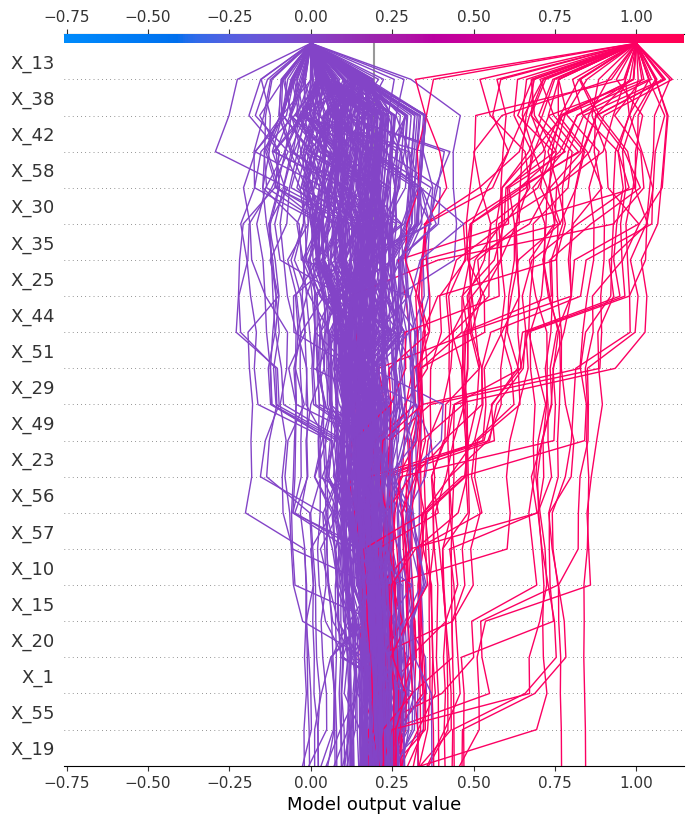

In [19]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test.columns)

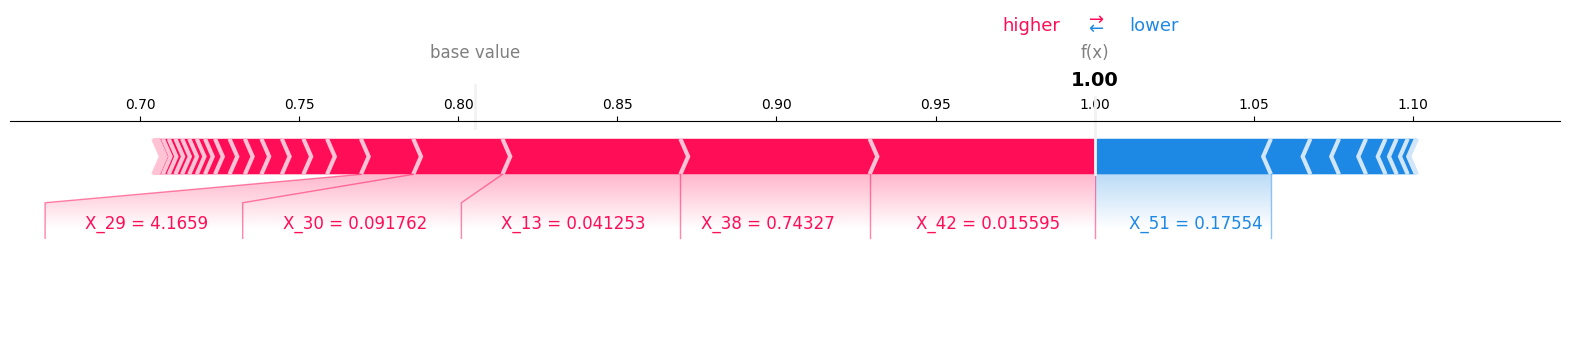

In [20]:
shap.plots.force(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0, :], matplotlib = True)

In [28]:
shap.waterfall_plot(shap_values[0])

AttributeError: 'numpy.ndarray' object has no attribute 'base_values'